In [34]:
import nilearn.plotting as nip
import nilearn.image as nii
import matplotlib.pyplot as plt

In [35]:
voiscolors = ["purple", "orange", "red", "green", "aqua"]
vois = ["Action", "LTM", "Perception", "Procedural", "WM"]
taskcolors = ["dodgerblue", "orange", "red", "purple", "green", "magenta"]
tasks = ["Emotion", "Gambling", "Language", "Relational", "Social", "WM"]
vimages = [nii.load_img("Rest/VOI_%s_mask_sum.nii" % (x,)) for x in vois]

## Independent Visualization

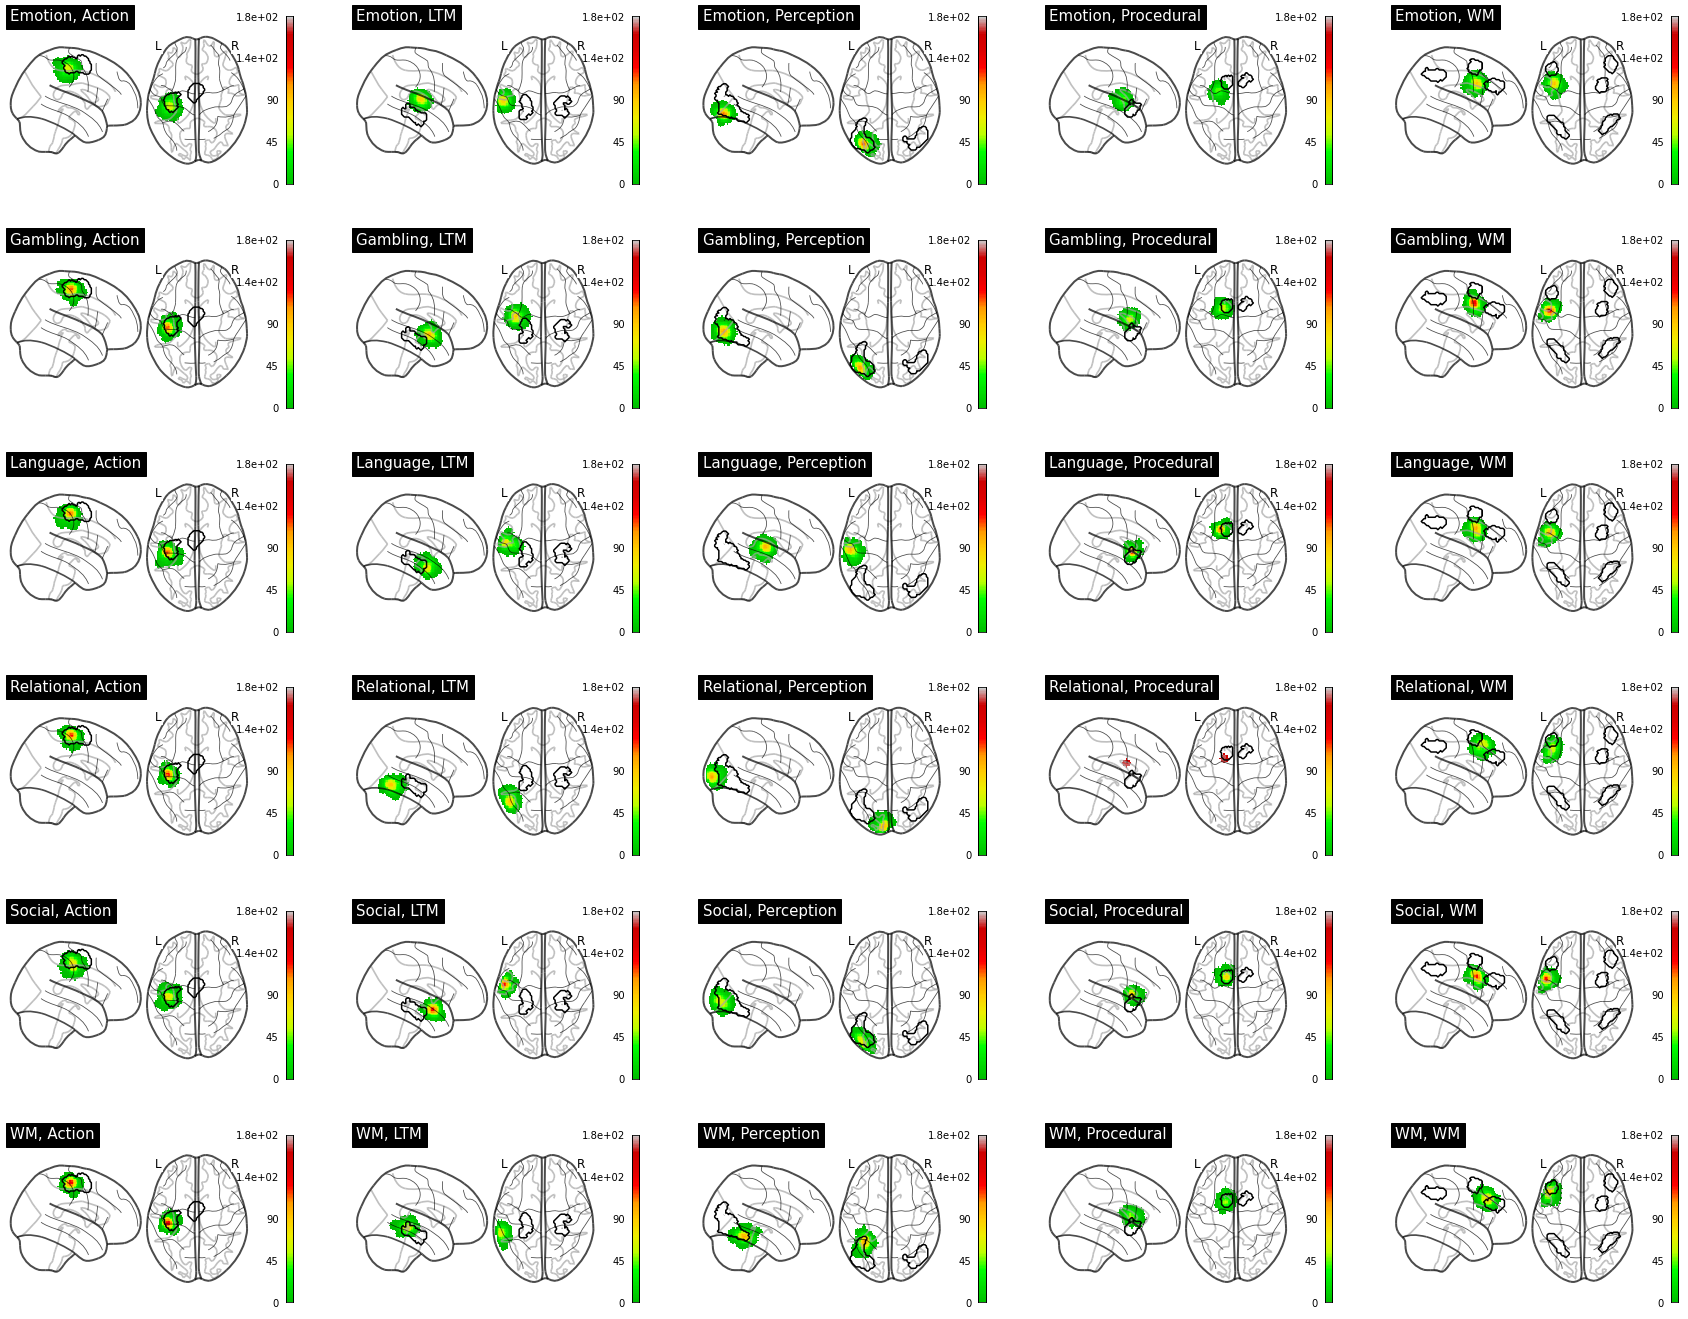

In [36]:
fig, axs = plt.subplots(len(tasks), len(vois), figsize=(30, 24))
it = 0
iv = 0
for iv, voi in enumerate(vois): 
    it = 0
    for task, tcolor in zip(tasks, taskcolors):
        #print("%s, %s" % (task, voi))
        d = nip.plot_glass_brain("%s/VOI_%s_mask_sum.nii" % (task, voi), display_mode='xz', plot_abs=False,
                                 title = "%s, %s" % (task, voi), axes=axs[it,iv], colorbar=True, cmap="nipy_spectral", vmax=180)
        rsname = voi.lower()
        d.add_contours("../../rsfMRI/rois/%s_optimized.nii" % (rsname,), levels=[0.001], colors="black")
        it = it + 1
plt.savefig("overlaps_across_tasks_and_vois.png")
plt.show()

## Overlap

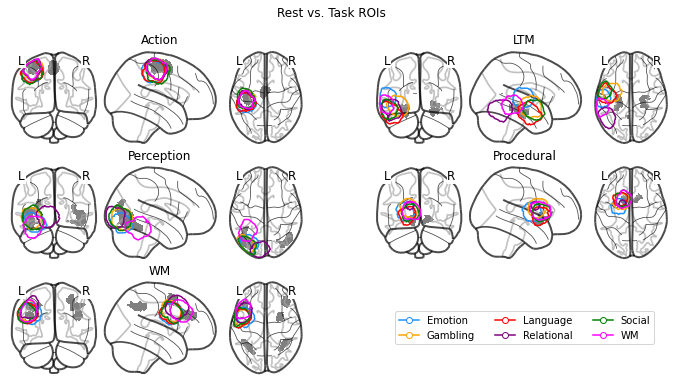

In [41]:
from matplotlib.lines import Line2D
fig, axs = plt.subplots(3, 2, figsize=(12, 6))

v_i = 0

for voi, vcolor in zip(vois, voiscolors): 
    vimg = nii.load_img("Rest/VOI_%s_mask_sum.nii" % (voi,))
    d=nip.plot_glass_brain(None, axes=axs.flat[v_i])
    #                      title=voi)
    d.add_contours(vimg, levels=[1], colors="grey", filled=True)
    for task, tcolor in zip(tasks, taskcolors):
        if task is not "Language" or voi is not "Perception": 
            d.add_contours("%s/VOI_%s_mask_sum.nii" % (task, voi), 
                           levels=[1], colors=tcolor)
    axs.flat[v_i].set_title(voi)
    v_i = v_i + 1

# Legend on last plot (empty cell)
axs.flat[v_i].set_axis_off()
handles = [Line2D([0], [0], marker='o', markerfacecolor='w', color=x, markersize=6) for x in taskcolors]
axs.flat[v_i].legend(handles, tasks, loc="center", ncol=3)

# Title
fig.suptitle("Rest vs. Task ROIs")
#fig.tight_layout()

# Save and visualize
plt.savefig("overlap_across_tasks_and_rest.png")
plt.show()